## Описание
На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день для каждой даты есть своя папка, внутри неё – папки для каждого пользователя внутри каждой папки есть файл data.csv, где и хранятся данные

## Задачи


1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id,             quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с         пользователем)

2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и     в алфавитном порядке.

3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с     product_id==56?

4. Визуализируйте продажи по дням.

5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

## Задание 1

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [7]:
import pandas as pd 
import os 

In [8]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/')
data_files = []
target_file = 'data.csv'
for i in tree:
    files = i[-1]
    if len(files)>0 and target_file in files:
        path = os.path.join(i[0], target_file)
        data_files.append(path)

In [9]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv',
 '/mnt/HC_Volume_18

In [11]:
data_files_df = []
for path in data_files:
    df = pd.read_csv(path, index_col = 0)
    
    
    df['name'] = path.split('/')[-2]
    df['date'] = path.split('/')[-3]
    data_files_df.append(df)

In [12]:
data = pd.concat(data_files_df, ignore_index= True)

In [13]:
data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


____

## Задание 2

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [21]:
sum_buy = data.groupby('name').quantity.sum()

In [22]:
max_buy = sum_buy.max()

In [23]:
sum_buy.loc[sum_buy==max_buy].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

____

## Задание 3

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [25]:
prod_sold = data.groupby('product_id', as_index = False)\
                .agg({'quantity':'sum'})

prod_sold

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


In [26]:
top_10 = prod_sold.sort_values('quantity',ascending=False)\
                  .head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


Text(0.5, 1.0, 'Топ 10 покупаемых товаров')

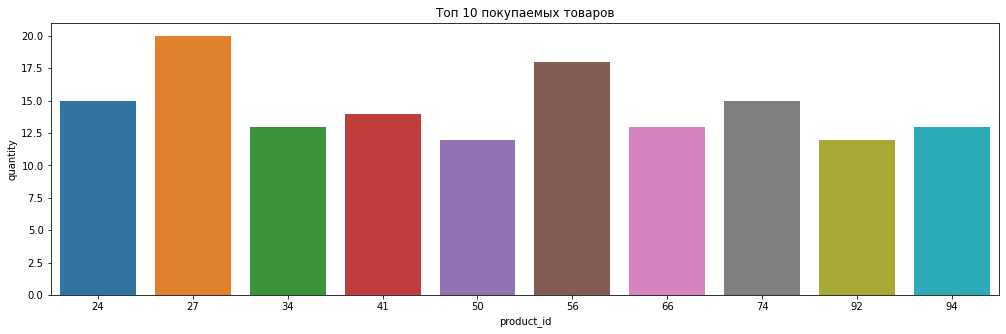

In [29]:
fig,ax = plt.subplots(figsize=(17, 5))
sns.barplot(data = top_10, 
            x = 'product_id',
            y = 'quantity')
ax.set_title('Топ 10 покупаемых товаров')

In [30]:
top_10.loc[top_10.product_id==56]

,product_id,quantity
42,56,18


____

## Задание 4


Визуализируйте продажи по дням.

In [31]:
sold_per_days = data.groupby('date', as_index = False)\
                .agg({'quantity':'sum'})

sold_per_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Text(0.5, 1.0, 'Распределение покупок по дням')

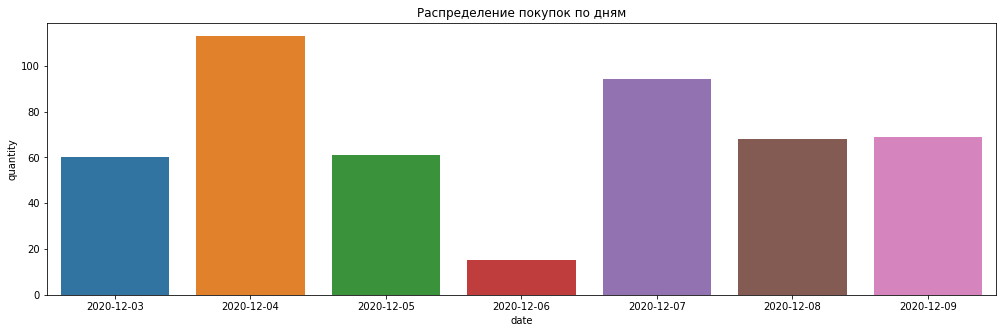

In [32]:
fig,ax = plt.subplots(figsize=(17, 5))
sns.barplot(data = sold_per_days, 
            x = 'date',
            y = 'quantity')
ax.set_title('Распределение покупок по дням')

____


## Задание 6

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [36]:
df = data.groupby(['name','product_id'])\
         .date\
         .nunique()\
         .sort_values(ascending=False)

In [38]:
df.loc[df > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64